In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# 파일 존재 여부 확인용
import os

In [6]:
# 훈련용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [7]:
# 랜덤숫자 생성
import random

In [8]:
# 모델
from tensorflow import keras

# 디렉토리 설정

In [9]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/01_Cloth Detection Model')

In [10]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1IE_8n95r-2qLINUcooIi9SdGkw55753B/[perst]데이터셋/MachineLearningProject/01_Cloth Detection Model'

# 변수 목록

In [11]:
# train_dir_name = "./Dataset/Train-Test_Multiple/Train/"
# test_dir_name = "./Dataset/Train-Test_Multiple/Test/"

train_dir_name = "./Dataset/Train-Test_All/Train/"
test_dir_name = "./Dataset/Train-Test_All/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [12]:
palette = [0,0,0,
          255,0,0,
          0,255,0,
          0,0,255,
          255,255,0]

In [13]:
label_string = "0:Background / 1:Outer / 2:Top / 3:Bottom / 4:Onepiece"

# Train 데이터와 Test 데이터 불러오기

In [14]:
x_train = []
y_train = []

for i in range(0, 8001):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Annotation/" + str(i) + ".png"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 라벨링 파일 로드
    label_file = np.asarray(Image.open(label_path))
    if label_file is None:
        print(str(i) + ".png File Load Failed!!")

    x_train.append(img_file)
    y_train.append(label_file)


    if len(y_train)%500 == 0: # 진행도 확인용
        print(str(len(y_train)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
Complete


In [15]:
x_test = []
y_test = []

for i in range(0, 2001):
    img_path = test_dir_name + "Image/" + str(i) + ".jpg"
    label_path = test_dir_name + "Annotation/" + str(i) + ".png"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break

    # 라벨링 파일 로드
    label_file = np.asarray(Image.open(label_path))
    if label_file is None:
        print(str(i) + ".png File Load Failed!!")

    x_test.append(img_file)
    y_test.append(label_file)


    if len(y_test)%500 == 0: # 진행도 확인용
        print(str(len(y_test)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
Complete


# Train 데이터에서 Validation 데이터 분리

In [16]:
x_train_ori = x_train[:]
y_train_ori = y_train[:]

In [17]:
x_train = []
y_train = []
x_val = []
y_val = []

x_train, x_val, y_train, y_val = train_test_split(x_train_ori, y_train_ori, test_size=0.25)

# 형태 확인

In [18]:
x_train = np.array(x_train)
x_train.shape

(6000, 200, 200, 3)

In [19]:
y_train = np.array(y_train)
y_train.shape

(6000, 200, 200)

In [20]:
x_val = np.array(x_val)
x_val.shape

(2000, 200, 200, 3)

In [21]:
y_val = np.array(y_val)
y_val.shape

(2000, 200, 200)

In [22]:
x_test = np.array(x_test)
x_test.shape

(2000, 200, 200, 3)

In [23]:
y_test = np.array(y_test)
y_test.shape

(2000, 200, 200)

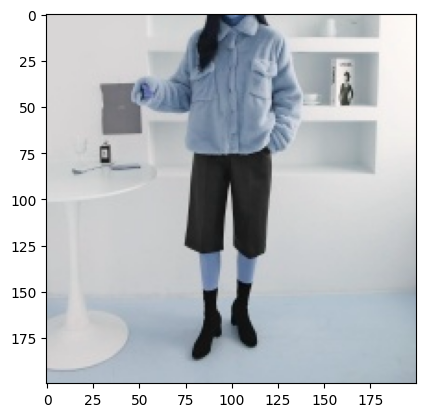

In [24]:
plt.imshow(x_train[0])
plt.show()

0:Background / 1:Outer / 2:Top / 3:Bottom / 4:Onepiece


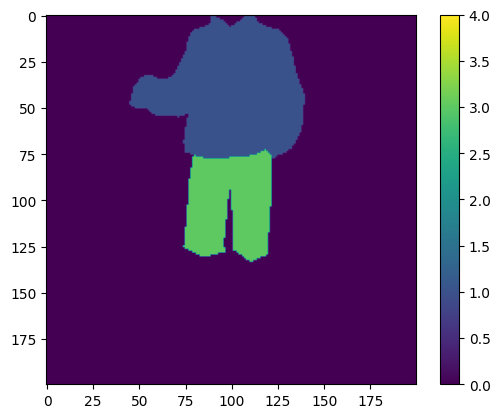

In [25]:
print(label_string)

plt.imshow(y_train[0])
plt.clim(0, 4)
plt.colorbar()
plt.show()

# 모델 생성

In [81]:
input_img = keras.layers.Input(shape=(img_height, img_width, 3))

conv1 = keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')(input_img)
conv1 = keras.layers.Dropout(0.3)(conv1)
conv1 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1)
pool1 = keras.layers.MaxPooling2D(2)(conv1)

conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
conv2 = keras.layers.Dropout(0.3)(conv2)
conv2 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2)
pool2 = keras.layers.MaxPooling2D(2)(conv2)

conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
conv3 = keras.layers.Dropout(0.4)(conv3)
conv3 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3)
pool3 = keras.layers.MaxPooling2D(2)(conv3)

conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(pool3)
conv4 = keras.layers.Dropout(0.4)(conv4)
conv4 = keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(conv4)
conv4 = keras.layers.Dropout(0.4)(conv4)

up1 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv4), conv3], axis=-1)
conv5 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(up1)
conv5 = keras.layers.Dropout(0.3)(conv5)
conv5 = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv5)

up2 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv5), conv2], axis=-1)
conv6 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(up2)
conv6 = keras.layers.Dropout(0.3)(conv6)
conv6 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv6)

up3 = keras.layers.concatenate([keras.layers.UpSampling2D(2)(conv6), conv1], axis=-1)
conv7 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(up3)
conv7 = keras.layers.Dropout(0.3)(conv7)
conv7 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv7)

output_img = keras.layers.Conv2D(filters=5, kernel_size=1, padding='same', activation='softmax', name='OutputLayer')(conv7)


In [83]:
poly_seg_model = keras.Model(input_img, output_img)
adam = keras.optimizers.Adam(learning_rate=0.0004)
poly_seg_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [84]:
poly_seg_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 200, 200, 64)         4864      ['input_3[0][0]']             
                                                                                                  
 dropout_16 (Dropout)        (None, 200, 200, 64)         0         ['conv2d_28[0][0]']           
                                                                                                  
 conv2d_29 (Conv2D)          (None, 200, 200, 64)         36928     ['dropout_16[0][0]']          
                                                                                            

In [64]:
# keras.utils.plot_model(poly_seg_model, show_shapes=True)

## 모델 이름은 안바꿔주면 이전 모델에 덮어쓰기되니까 잊지말고 꼭 바꿔주자

In [85]:
model_path = model_dir_name + 'poly_seg_model_0429_01.keras'

# 모델 학습

In [86]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [88]:
history = poly_seg_model.fit(x_train, y_train,
                             epochs=50, verbose=1,
                             validation_data=(x_val, y_val),
                             callbacks=[checkpoint_cb, early_stopping_cb])

print()
print("Complete")

Epoch 1/50
188/188 [==============================] - 207s 1s/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.3321 - val_sparse_categorical_accuracy: 0.9010
Epoch 2/50
188/188 [==============================] - 206s 1s/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.3007 - val_sparse_categorical_accuracy: 0.9096
Epoch 3/50
188/188 [==============================] - 206s 1s/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9647 - val_loss: 0.3089 - val_sparse_categorical_accuracy: 0.9060
Epoch 4/50
188/188 [==============================] - 206s 1s/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.3427 - val_sparse_categorical_accuracy: 0.9005
Epoch 5/50
188/188 [==============================] - 206s 1s/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.3178 - val_sparse_categorical_accuracy: 0.9032
Epoch 6/50
188/188 [==============================] - 206s 1s/step - loss: 0.0962 - sparse_cate

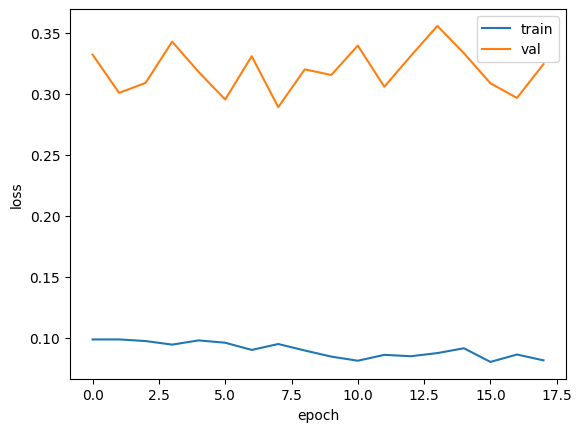

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 테스트

In [90]:
saved_model_path = model_dir_name + 'poly_seg_model_0429_01.keras'

saved_model = keras.models.load_model(saved_model_path)

In [91]:
saved_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 200, 200, 64)         4864      ['input_3[0][0]']             
                                                                                                  
 dropout_16 (Dropout)        (None, 200, 200, 64)         0         ['conv2d_28[0][0]']           
                                                                                                  
 conv2d_29 (Conv2D)          (None, 200, 200, 64)         36928     ['dropout_16[0][0]']          
                                                                                            

## 1개 Test 데이터 예측결과 확인

Random Number :  1930


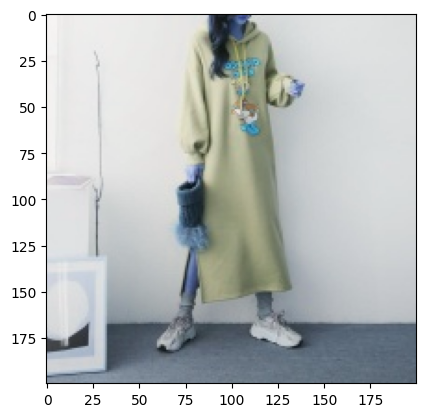

In [42]:
num = random.randint(0, 1999)
print("Random Number : ", num)

plt.imshow(x_test[num])
plt.show()

In [92]:
preds = saved_model.predict(x_test[num:num+1])
type(preds)

1/1 [==============================] - 0s 213ms/step


numpy.ndarray

In [93]:
preds.shape

(1, 200, 200, 5)

In [94]:
pred_mask = preds.argmax(axis=-1)
pred_mask.shape

(1, 200, 200)

In [95]:
np.unique(pred_mask[0])

array([0, 1, 2, 3, 4])

In [96]:
x_test_rgb = cv2.cvtColor(x_test[num], cv2.COLOR_BGR2RGB) # RGB를 RGB 색공간으로 변경

0:Background / 1:Outer / 2:Top / 3:Bottom / 4:Onepiece


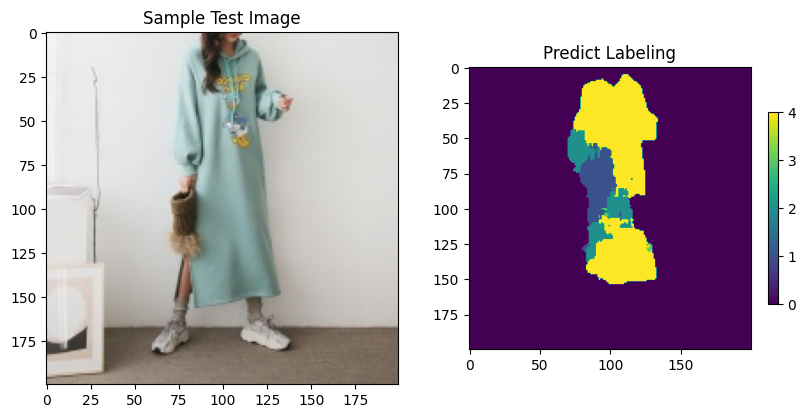

In [97]:
print(label_string)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_test_rgb)
plt.title("Sample Test Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask[0])
plt.clim(0, 4)
plt.colorbar(shrink=0.5)
plt.title("Predict Labeling")

plt.show()

0:Background / 1:Outer / 2:Top / 3:Bottom / 4:Onepiece


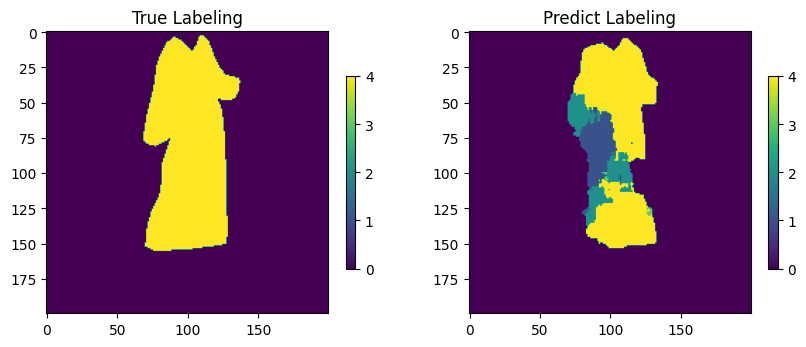

In [98]:
print(label_string)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(y_test[num])
plt.clim(0, 4)
plt.colorbar(shrink=0.5)
plt.title("True Labeling")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask[0])
plt.clim(0, 4)
plt.colorbar(shrink=0.5)
plt.title("Predict Labeling")

plt.show()

In [99]:
acc = keras.metrics.SparseCategoricalAccuracy()
acc.reset_state()
acc.update_state(pred_mask[0], y_test[num:num+1])
acc.result().numpy()

0.235

## 전체 Test 데이터의 정확도 확인

In [100]:
 saved_model.evaluate(x_test, y_test)

63/63 [==============================] - 16s 252ms/step - loss: 0.2977 - sparse_categorical_accuracy: 0.9061


[0.29773828387260437, 0.9061368107795715]

## 남성 모델 이미지의 predict 결과 확인

## 이미지 불러오기

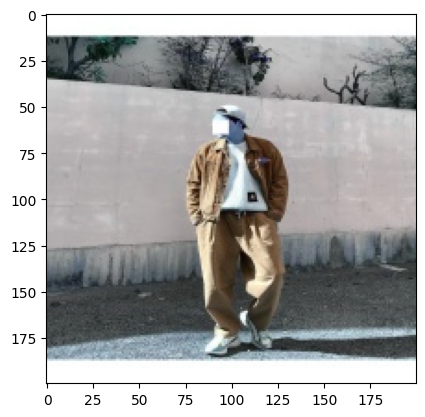

In [52]:
man_img_path = './Dataset/man_sample.jpg'

man_img = cv2.imread(man_img_path)
if man_img is None:
    print('Image File Load Failed!!')
else:
    plt.imshow(man_img)
    plt.show()

In [53]:
man_img_array = np.array([man_img])
man_img_array.shape

(1, 200, 200, 3)

## 모델 예측

In [101]:
preds = saved_model.predict(man_img_array[:])
type(preds)

1/1 [==============================] - 0s 43ms/step


numpy.ndarray

In [102]:
preds.shape

(1, 200, 200, 5)

In [103]:
pred_mask = preds.argmax(axis=-1)
pred_mask.shape

(1, 200, 200)

In [104]:
np.unique(pred_mask[0])

array([0, 1, 2, 3])

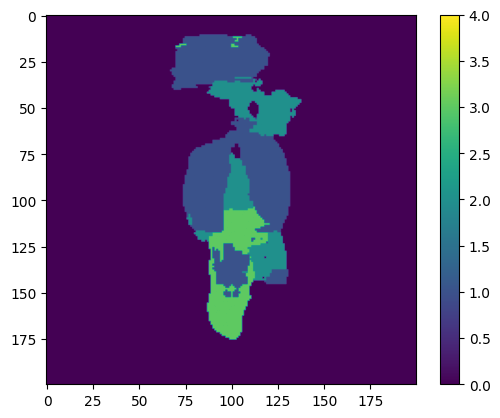

In [105]:
plt.imshow(pred_mask[0])
plt.clim(0, 4)
plt.colorbar()
plt.show()

In [106]:
man_img_rgb = cv2.cvtColor(man_img, cv2.COLOR_BGR2RGB) # RGB를 RGB 색공간으로 변경

0:Background / 1:Outer / 2:Top / 3:Bottom / 4:Onepiece


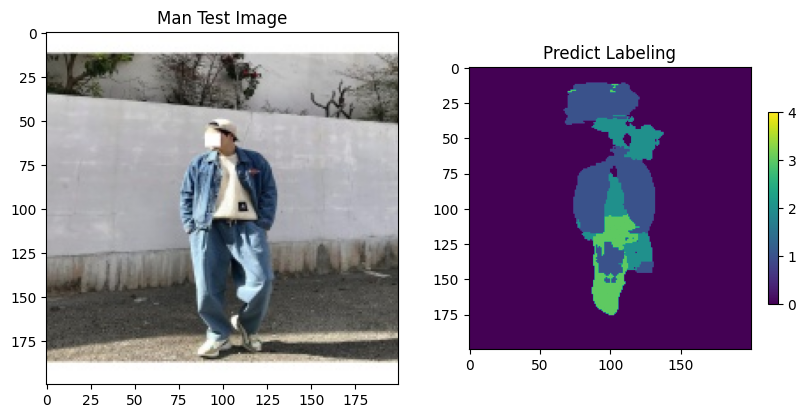

In [107]:
print(label_string)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(man_img_rgb)
plt.title("Man Test Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask[0])
plt.clim(0, 4)
plt.colorbar(shrink=0.5)
plt.title("Predict Labeling")

plt.show()